# Modern Data Science 
**(Module 02: Data Visualization)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---

# Session Q - GraphViz

Graphviz is open source graph visualization software. It has several main graph layout programs. The Graphviz layout tools take descriptions of graphs in a simple text language, and make diagrams in several useful formats such as images and SVG for web pages, Postscript for inclusion in PDF or other documents; or display in an interactive graph browser. 

Graphviz layout tools accept inputs in the `DOT` language, which describes :
* graphs
* nodes
* edges

We can use `DOT` language to describe the graph structure, and specify the shape, color etc. 

[Adapted from here](http://graphviz.readthedocs.io/en/stable/index.html)


`graphviz` provides a simple pure-Python interface for the Graphviz graph-drawing software. To install it with pip run the following:


In [1]:
!pip install graphviz

The `graphviz` module provides two classes: `Graph` and `Digraph`. They create graph descriptions in the [DOT](https://www.graphviz.org/doc/info/lang.html) language for undirected and directed graphs respectively. They have the same [API](http://graphviz.readthedocs.io/en/stable/api.html#api).



## Basic Components

Create a graph by instantiating a new `Graph` or `Digraph` object:



In [2]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')

Their constructors allow to set the graph’s `name`, the `filename` for the DOT source and the rendered graph, a `comment` for the first source code line, etc.

Add nodes and edges to the graph object using its `node()` and `edge()` or `edges()` methods:

The `node()` method takes a name identifier as first argument and an optional label. The `edge()` method takes the names of start- and end-node, while `edges()` takes iterable of name-pairs. Keyword arguments are turned into (node and edge) attributes (see [Graphviz docs](https://www.graphviz.org/doc/info/attrs.html)).



In [3]:
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [4]:
print(dot.source) 

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


We can show the rendered graph using:

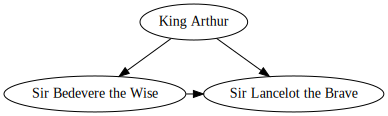

In [5]:
dot

## Styling


Use the `graph_attr`, `node_attr`, and `edge_attr` arguments to change the default appearance of your graph, nodes, and edges.

In [6]:
ps = Digraph(name='pet-shop', node_attr={'shape': 'plaintext'})

ps.node('parrot')
ps.node('dead')
ps.edge('parrot', 'dead')

In [7]:
print(ps.source)

digraph "pet-shop" {
	node [shape=plaintext]
	parrot
	dead
	parrot -> dead
}


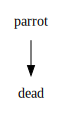

In [8]:
ps

In [9]:
ps.graph_attr['rankdir'] = 'LR'
ps.edge_attr.update(arrowhead='vee', arrowsize='2')

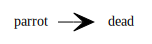

In [10]:
ps

## Attributes

To directly add attitbute statements (affecting all following graph, node, or edge items within the same (sub-)graph), use the `attr()` -method with the target as first argument:

In [11]:
from graphviz import Graph

ni = Graph('ni')

ni.attr('node', shape='rarrow')
ni.node('1', 'Ni!')
ni.node('2', 'Ni!')

ni.node('3', 'Ni!', shape='egg')

ni.attr('node', shape='star')
ni.node('4', 'Ni!')
ni.node('5', 'Ni!')

By omitting its first argument, you can use it to set arbitrary attributes as key-value pairs targeting the current (sub-)graph (e.g. for `rankdir`, `label`, or setting `rank=same` within a subgraph context):

In [12]:
ni.attr(rankdir='LR')

ni.edges(['12', '23', '34', '45'])

In [13]:
print(ni.source)

graph ni {
	node [shape=rarrow]
	1 [label="Ni!"]
	2 [label="Ni!"]
	3 [label="Ni!" shape=egg]
	node [shape=star]
	4 [label="Ni!"]
	5 [label="Ni!"]
	rankdir=LR
	1 -- 2
	2 -- 3
	3 -- 4
	4 -- 5
}


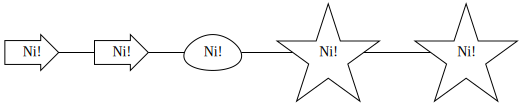

In [14]:
ni

## Quoting and HTML-like labels

The graph-building methods of `Graph` and `Digraph` objects automatically take care of quoting/escaping strings [where required](https://www.graphviz.org/doc/info/lang.html) (whitespace, keywords, double quotes, etc.):

In [15]:
q = Digraph()
q.edge('spam', 'eggs eggs')
q.edge('node', '"here\'s a quote"')

digraph {
	spam -> "eggs eggs"
	"node" -> "\"here's a quote\""
}


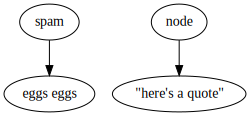

In [16]:
print(q.source)  
q

If a string starts with < and ends with >, it is passed on as is, without quoting/escaping: The content between the angle brackets is treated by the engine as special HTML string that can be used for [HTML-like labels](https://graphviz.gitlab.io/_pages/doc/info/shapes.html#html):

In [17]:
h = Graph('html_table')
h.node('tab', label='''<<TABLE>
...  <TR>
...    <TD>left</TD>
...    <TD>right</TD>
...  </TR>
... </TABLE>>''')

In [18]:
print(h.source)

graph html_table {
	tab [label=<<TABLE>
...  <TR>
...    <TD>left</TD>
...    <TD>right</TD>
...  </TR>
... </TABLE>>]
}


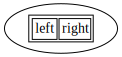

In [19]:
h

For strings that should literally begin with < and end with >, use the `nohtml()` function to disable the special meaning of angled parenthesis and apply normal quoting/escaping (before 0.8.2, the only workaround was to add leading or trailing space, e.g. `label=' <>'`):

In [20]:
from graphviz import nohtml

d = Digraph(format='svg')
d.node('diamond', label=nohtml('<>'))

digraph {
	diamond [label="<>"]
}


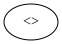

In [21]:
print(d.source)  
d

## Subgraphs & clusters


Graph and Digraph objects have a `subgraph()`-method for adding a subgraph to an instance.

There are two ways to use it: 

### Usage 1

Either with a ready-made graph object of the same kind as the only argument (whose content is added as a subgraph) or omitting the `graph` argument (returning a context manager for defining the subgraph content more elegantly within a `with`-block).

First usage option, with graph as the only argument:

In [22]:
p = Graph(name='parent')
p.edge('spam', 'eggs')

c = Graph(name='child', node_attr={'shape': 'box'})
c.edge('foo', 'bar')

p.subgraph(c)

graph child {
	node [shape=box]
	foo -- bar
}


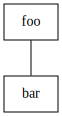

In [23]:
print(c.source)
c

graph parent {
	spam -- eggs
	subgraph child {
		node [shape=box]
		foo -- bar
	}
}


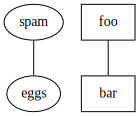

In [24]:
print(p.source)
p

### Usage 2

Second usage, with a `with`-block (omitting the graph argument):

In [25]:
p = Graph(name='parent')
p.edge('spam', 'eggs')

with p.subgraph(name='child', node_attr={'shape': 'box'}) as c: c.edge('foo', 'bar')

graph parent {
	spam -- eggs
	subgraph child {
		node [shape=box]
		foo -- bar
	}
}


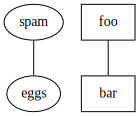

In [26]:
print(p.source)
p

## Custom DOT statements

To add arbitrary statements to the created DOT source, use the body attribute of the `Graph` or `Digraph` object. It holds the verbatim list of lines to be written to the source file. Use its `append()` or `extend()` method.

Note that you might need to correctly quote/escape identifiers and strings containing whitespace or other special characters when using this method.


In [27]:
rt = Digraph(comment='The Round Table')

rt.body.append('\t"King Arthur" -> {\n\t\t"Sir Bedevere", "Sir Lancelot"\n\t}')
rt.edge('Sir Bedevere', 'Sir Lancelot', constraint='false')

// The Round Table
digraph {
	"King Arthur" -> {
		"Sir Bedevere", "Sir Lancelot"
	}
	"Sir Bedevere" -> "Sir Lancelot" [constraint=false]
}


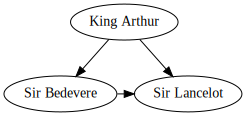

In [28]:
print(rt.source) 
rt

## Using raw DOT

To render a ready-made DOT source code string (instead of assembling one with the higher-level interface of `Graph` or `Digraph`), create a `Source` object holding your DOT string:



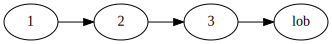

In [29]:
from graphviz import Source

src = Source('digraph "the holy hand grenade" { rankdir=LR; 1 -> 2 -> 3 -> lob }')
src

## Existing files

To directly render an existing DOT source file (e.g. created with other tools), you can use the `Source.from_file()` function.

In [30]:
!ls *.gv
#!rm *.gv

ls: cannot access *.gv: No such file or directory


In [36]:
!pip install wget

  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


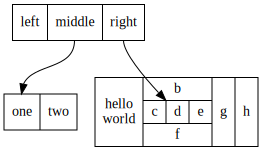

In [37]:
from graphviz import render

import wget
wget.download('https://github.com/tuliplab/mds/raw/master/Jupyter/data/gvsample0.gv')


Source.from_file('gvsample0.gv')

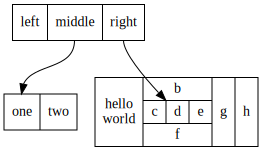

In [39]:
wget.download('https://github.com/tuliplab/mds/raw/master/Jupyter/data/gvsample1.gv')

Source.from_file('gvsample1.gv')

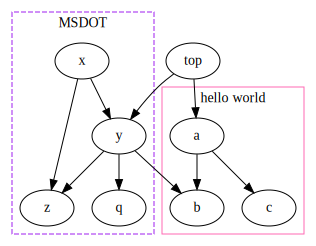

In [40]:
wget.download('https://github.com/tuliplab/mds/raw/master/Jupyter/data/gvsample2.gv')


Source.from_file('gvsample2.gv')

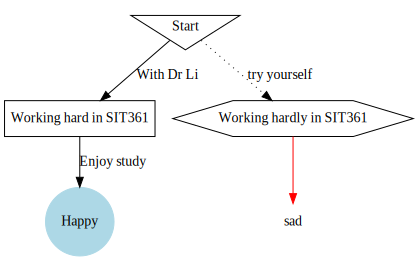

In [41]:
wget.download('https://github.com/tuliplab/mds/raw/master/Jupyter/data/gvsample3.gv')

Source.from_file('gvsample3.gv')

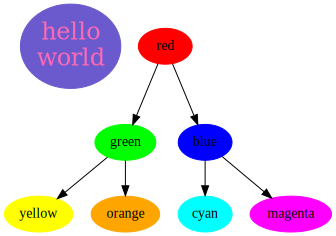

In [42]:
wget.download('https://github.com/tuliplab/mds/raw/master/Jupyter/data/gvsample4.gv')

Source.from_file('gvsample4.gv')

## Examples

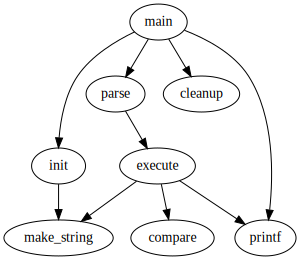

In [43]:
from graphviz import Source

src = Source(
'digraph G {main->parse -> execute;main->init;main->cleanup;execute -> make_string;execute -> printf;init -> make_string;main -> printf;execute -> compare;}') 
             
src

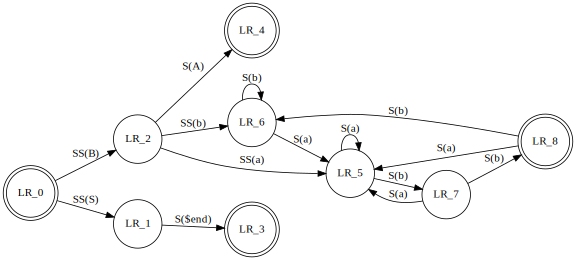

In [44]:
# http://www.graphviz.org/content/fsm

from graphviz import Digraph

f = Digraph('finite_state_machine', filename='fsm.gv')
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='doublecircle')
f.node('LR_0')
f.node('LR_3')
f.node('LR_4')
f.node('LR_8')

f.attr('node', shape='circle')
f.edge('LR_0', 'LR_2', label='SS(B)')
f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)')
f.edge('LR_2', 'LR_6', label='SS(b)')
f.edge('LR_2', 'LR_5', label='SS(a)')
f.edge('LR_2', 'LR_4', label='S(A)')
f.edge('LR_5', 'LR_7', label='S(b)')
f.edge('LR_5', 'LR_5', label='S(a)')
f.edge('LR_6', 'LR_6', label='S(b)')
f.edge('LR_6', 'LR_5', label='S(a)')
f.edge('LR_7', 'LR_8', label='S(b)')
f.edge('LR_7', 'LR_5', label='S(a)')
f.edge('LR_8', 'LR_6', label='S(b)')
f.edge('LR_8', 'LR_5', label='S(a)')

f

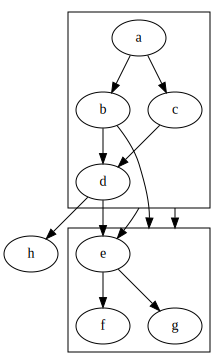

In [45]:
# http://www.graphviz.org/pdf/dotguide.pdf Figure 20

from graphviz import Digraph

g = Digraph('G', filename='cluster_edge.gv')
g.attr(compound='true')

with g.subgraph(name='cluster0') as c:
    c.edges(['ab', 'ac', 'bd', 'cd'])

with g.subgraph(name='cluster1') as c:
    c.edges(['eg', 'ef'])

g.edge('b', 'f', lhead='cluster1')
g.edge('d', 'e')
g.edge('c', 'g', ltail='cluster0', lhead='cluster1')
g.edge('c', 'e', ltail='cluster0')
g.edge('d', 'h')

g

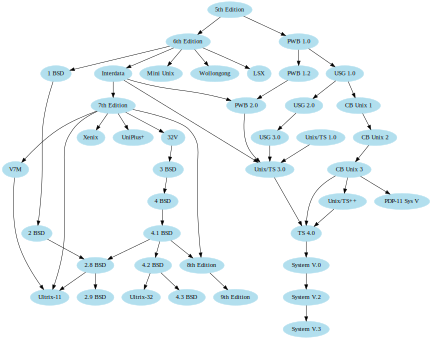

In [46]:
#!/usr/bin/env python
# unix.py - http://www.graphviz.org/content/unix

from graphviz import Digraph

u = Digraph('unix', filename='unix.gv')
u.attr(size='6,6')
u.node_attr.update(color='lightblue2', style='filled')

u.edge('5th Edition', '6th Edition')
u.edge('5th Edition', 'PWB 1.0')
u.edge('6th Edition', 'LSX')
u.edge('6th Edition', '1 BSD')
u.edge('6th Edition', 'Mini Unix')
u.edge('6th Edition', 'Wollongong')
u.edge('6th Edition', 'Interdata')
u.edge('Interdata', 'Unix/TS 3.0')
u.edge('Interdata', 'PWB 2.0')
u.edge('Interdata', '7th Edition')
u.edge('7th Edition', '8th Edition')
u.edge('7th Edition', '32V')
u.edge('7th Edition', 'V7M')
u.edge('7th Edition', 'Ultrix-11')
u.edge('7th Edition', 'Xenix')
u.edge('7th Edition', 'UniPlus+')
u.edge('V7M', 'Ultrix-11')
u.edge('8th Edition', '9th Edition')
u.edge('1 BSD', '2 BSD')
u.edge('2 BSD', '2.8 BSD')
u.edge('2.8 BSD', 'Ultrix-11')
u.edge('2.8 BSD', '2.9 BSD')
u.edge('32V', '3 BSD')
u.edge('3 BSD', '4 BSD')
u.edge('4 BSD', '4.1 BSD')
u.edge('4.1 BSD', '4.2 BSD')
u.edge('4.1 BSD', '2.8 BSD')
u.edge('4.1 BSD', '8th Edition')
u.edge('4.2 BSD', '4.3 BSD')
u.edge('4.2 BSD', 'Ultrix-32')
u.edge('PWB 1.0', 'PWB 1.2')
u.edge('PWB 1.0', 'USG 1.0')
u.edge('PWB 1.2', 'PWB 2.0')
u.edge('USG 1.0', 'CB Unix 1')
u.edge('USG 1.0', 'USG 2.0')
u.edge('CB Unix 1', 'CB Unix 2')
u.edge('CB Unix 2', 'CB Unix 3')
u.edge('CB Unix 3', 'Unix/TS++')
u.edge('CB Unix 3', 'PDP-11 Sys V')
u.edge('USG 2.0', 'USG 3.0')
u.edge('USG 3.0', 'Unix/TS 3.0')
u.edge('PWB 2.0', 'Unix/TS 3.0')
u.edge('Unix/TS 1.0', 'Unix/TS 3.0')
u.edge('Unix/TS 3.0', 'TS 4.0')
u.edge('Unix/TS++', 'TS 4.0')
u.edge('CB Unix 3', 'TS 4.0')
u.edge('TS 4.0', 'System V.0')
u.edge('System V.0', 'System V.2')
u.edge('System V.2', 'System V.3')

u

## Exercises

Please write script to generate the following four graphs.

There are six figures below, select any four of them, and use GraphViz/DOT to reproduce them:

* As you can't specify the location of labels in DOT, you can use subgraph to put several element together;
* It is almost certain that your generated graph will be different from what is shown here, however, as long as they have the same topological structure, the implementation is correct.



![Figure1](https://github.com/tuliplab/mds/raw/master/Jupyter/image/f1.png "Figure 1")

![Figure 2](https://github.com/tuliplab/mds/raw/master/Jupyter/image/f2.png "Figure 2")

![Figure 3](https://github.com/tuliplab/mds/raw/master/Jupyter/image/f3.png "Figure 3")

![Figure 4](https://github.com/tuliplab/mds/raw/master/Jupyter/image/f4.png "Figure 4")

![Figure 5](https://github.com/tuliplab/mds/raw/master/Jupyter/image/f5.png "Figure 5")

![Figure 6](https://github.com/tuliplab/mds/raw/master/Jupyter/image/f6.png "Figure 6")